やること
- MTQノイズに特化して行う

## 初期条件

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import glob
import pickle
import random

from visualize import visualization
myvs = visualization()
from select_datasets import Select_datasets as my_SD
myds = my_SD("/data7/ALL/db/ns/8k")
from sklearn.preprocessing import StandardScaler


#sample_data

path="/data6/ALL/db/ns/8k"
npz_files = glob.glob(path+"/**.npz")

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.get_cmap("Set1").colors)

d = np.load(npz_files[3])

D_df = pd.DataFrame(d["arr_0"]).T

# Constant

f_s = 12.5*10**3
th_s = 2
N = 4096
pixel_number=36

f_range = f_s/th_s
f_resolution = f_range/N

min_freq = 15
max_freq = 400

start = math.ceil(min_freq/f_resolution)-1
stop = math.ceil(max_freq/f_resolution)-1

x = np.arange(start+1,stop+1)*f_resolution
D_df_limfreq = D_df.iloc[:,start:stop]


## データゲット


In [2]:
# low freq

Imamura_list_data6 = glob.glob("/home/kashiwazaki/Bthesis/edata_/edata/**.npz")
df_imamura_abnormal_data = myds.concat_npz(Imamura_list_data6)
df_ImamuraAbnormal_pre = df_imamura_abnormal_data.iloc[:,start:stop]
df_ImamuraAbnormal_pre = myds.delete_0_gyou(df_ImamuraAbnormal_pre)

Imamura_list_data7 = []
for d in Imamura_list_data6:
    Imamura_list_data7.append("/data7/ALL/db/ns/8k/"+d.split("/")[-1]) 

df_ImamuraAbnormal_pre

/usr/local/conda/lib/python3.7/site-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


9           10          11          12          13          14   \
0     359.777974  664.342829  448.934787  442.248531  491.586729  486.444766   
1     390.559601  538.773766  412.516400  409.998736  433.729536  469.804461   
2     415.428903  639.269091  407.941370  498.672802  419.393052  448.678707   
3     463.934495  633.676450  452.945362  443.400443  464.953938  447.329716   
4     441.654889  613.613300  414.709735  447.478414  435.676059  546.414958   
...          ...         ...         ...         ...         ...         ...   
1351  365.125588  351.371873  424.736720  462.234147  380.036398  459.515105   
1352  399.870585  373.900058  395.391701  421.613825  431.987294  468.225254   
1353  355.564324  404.980144  420.636500  397.999514  411.826084  394.862378   
1354  362.636398  394.689504  394.567962  424.107291  420.603326  396.297681   
1355  378.716803  359.689068  413.894291  444.670329  471.437070  435.167002   

             15          16          17          18   ...         252  \
0     523.136630  503.168286  580.476229  655.137577  ...  527.015441   
1     412.760875  488.651160  514.172225  572.956507  ...  657.387581   
2     472.457102  513.246080  513.476507  601.182834  ...  579.845709   
3     458.478115  478.805274  477.980425  583.222337  ...  614.171559   
4     460.873353  478.132137  513.714001  552.188177  ...  545.385980   
...          ...         ...         ...         ...  ...         ...   
1351  467.340087  476.564595  475.412417  553.091868  ...  566.878952   
1352  490.391776  548.671168  504.802418  557.816123  ...  548.183512   
1353  483.585590  501.425054  499.329295  444.925006  ...  585.370690   
1354  545.784115  550.149771  512.409918  522.819205  ...  594.420446   
1355  474.388976  504.924682  500.407570  571.696396  ...  562.185464   

             253         254         255         256         257         258  \
0     521.910806  564.558497  566.571556  650.762127  607.437534  546.998628   
1     549.448415  513.697915  555.560215  608.625765  574.175789  588.523898   
2     565.377236  471.485967  587.302739  577.603850  607.117386  539.095967   
3     530.049100  605.651282  593.503899  480.322189  570.295885  595.703425   
4     500.705453  579.729638  529.849471  549.735027  532.182222  502.503837   
...          ...         ...         ...         ...         ...         ...   
1351  615.428940  536.993496  619.065601  572.555419  550.982256  604.678577   
1352  613.978505  633.565723  624.532991  500.378263  545.923901  576.698857   
1353  592.977456  537.852943  564.193527  506.592656  538.986335  631.813060   
1354  566.191055  583.175991  582.232090  507.000760  451.609194  561.866751   
1355  533.685312  633.380612  505.183689  622.764235  492.910111  633.315940   

             259         260         261  
0     578.867737  624.791811  558.030378  
1     555.692123  534.614769  574.088682  
2     657.801318  541.437824  611.963983  
3     477.582883  559.419954  645.582810  
4     555.054418  577.819003  597.277680  
...          ...         ...         ...  
1351  607.688011  474.209352  572.210552  
1352  537.656098  569.138377  565.046835  
1353  577.000889  572.599777  584.777962  
1354  556.554693  552.587848  582.518347  
1355  542.249298  612.497866  585.232062  

[1356 rows x 253 columns]

In [3]:
df_ImamuraAbnormal_train,df_ImamuraAbnormal_test = myds.train_test_dataframe(df_ImamuraAbnormal_pre,test_frac=0.5)

In [4]:
# MTQ data6

MTQ_list_data6 = [
    "/data6/2108_ResolveIT_TC3/db.old/ns/8k/ns8k_20210914-050153.npz",
    "/data6/2108_ResolveIT_TC3/db.old/ns/8k/ns8k_20210914-052114.npz",
    "/data6/2108_ResolveIT_TC3/db.old/ns/8k/ns8k_20210914-050812.npz",
    "/data6/2108_ResolveIT_TC3/db.old/ns/8k/ns8k_20210914-051344.npz",
    "/data6/2108_ResolveIT_TC3/db.old/ns/8k/ns8k_20210914-055706.npz",
    "/data6/2108_ResolveIT_TC3/db.old/ns/8k/ns8k_20210915-044032.npz",
    "/data6/2108_ResolveIT_TC3/db.old/ns/8k/ns8k_20210915-062350.npz",
    "/data6/2108_ResolveIT_TC3/db.old/ns/8k/ns8k_20210915-054151.npz",
    "/data6/2108_ResolveIT_TC3/db.old/ns/8k/ns8k_20210915-051018.npz",
    "/data6/2108_ResolveIT_TC3/db.old/ns/8k/ns8k_20210915-051957.npz",
    "/data6/2108_ResolveIT_TC3/db.old/ns/8k/ns8k_20210915-045239.npz",
    "/data6/2108_ResolveIT_TC3/db.old/ns/8k/ns8k_20210915-045819.npz",]

df_data6_MTQ_noise = myds.concat_npz(target_list=MTQ_list_data6)
df_data6_MTQNoise_pre = df_data6_MTQ_noise.iloc[:,start:stop]
df_data6_MTQNoise_pre = myds.delete_0_gyou(df_data6_MTQNoise_pre)

df_data6_MTQNoise_pre

/usr/local/conda/lib/python3.7/site-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


9           10          11          12          13          14   \
0    391.883801  405.818049  395.367284  426.688728  525.072602  485.397452   
1    376.787557  382.633365  378.536320  453.231243  402.005361  450.669503   
2    428.663409  409.873040  457.147612  457.512796  417.357855  522.579472   
3    368.541949  408.930686  395.316488  428.764503  502.792060  497.178394   
4    381.277707  388.258433  386.594230  398.213875  435.662743  438.137974   
..          ...         ...         ...         ...         ...         ...   
405  393.092210  359.620470  388.720229  435.335668  433.069001  428.727773   
406  378.250309  380.789855  425.943224  468.481351  436.301126  459.990686   
407  377.045905  434.702066  377.473234  464.642875  427.524382  455.098814   
408  392.638389  336.204995  382.295393  408.699040  400.507533  427.027584   
409  339.994493  392.098387  337.894618  435.983069  476.403611  489.107259   

            15          16          17          18   ...         252  \
0    507.357185  482.428904  530.731045  566.619011  ...  575.369360   
1    427.212357  474.625586  507.825189  446.752146  ...  477.332259   
2    489.827375  495.460255  514.184364  494.287057  ...  506.428507   
3    481.205844  471.428736  519.659402  550.745833  ...  567.435968   
4    465.321488  455.066354  526.272048  469.507524  ...  577.619339   
..          ...         ...         ...         ...  ...         ...   
405  482.069380  513.818246  475.811349  598.996202  ...  687.209690   
406  533.564940  526.083793  522.019695  553.224807  ...  618.922379   
407  452.932041  494.249382  521.042380  526.865608  ...  563.567019   
408  416.276912  500.427252  482.312962  478.186526  ...  652.036306   
409  471.365880  493.180269  442.990682  563.983474  ...  578.066331   

            253         254         255         256         257         258  \
0    562.194441  561.984541  525.104199  562.163137  485.163302  560.721121   
1    492.836581  536.704859  508.035526  560.790087  487.857856  547.065450   
2    548.450248  562.532885  592.292209  606.624345  538.668668  557.160116   
3    596.940880  540.381957  533.638476  565.614697  617.196020  545.910806   
4    579.903306  554.496478  549.795936  576.940017  525.481525  585.008675   
..          ...         ...         ...         ...         ...         ...   
405  599.891526  521.259903  529.182655  623.800585  600.300525  553.137141   
406  621.974137  513.223636  581.215347  531.967888  569.317813  517.216883   
407  600.944973  613.143202  637.682013  606.927700  540.040936  508.072494   
408  551.411443  597.828049  540.396876  619.029014  582.719758  521.618100   
409  572.476047  559.357950  569.637365  590.442979  550.322258  606.270462   

            259         260         261  
0    597.370675  567.979621  539.468682  
1    572.077234  543.500773  519.364737  
2    555.724695  505.671103  569.175582  
3    520.027646  513.193707  566.050326  
4    515.670959  618.752709  538.774643  
..          ...         ...         ...  
405  544.445192  557.969274  541.588546  
406  571.957030  532.093621  551.663539  
407  504.023762  503.003812  631.760916  
408  528.372376  577.731577  597.867021  
409  639.795305  545.870246  585.105186  

[410 rows x 253 columns]

In [5]:
# MTQ data7

MTQ_list_data7 = [
    "/data7/ALL/db/ns/8k/ns8k_20220609-062512.npz",
    "/data7/ALL/db/ns/8k/ns8k_20220611-020610.npz",
    "/data7/ALL/db/ns/8k/ns8k_20220611-021235.npz",
    "/data7/ALL/db/ns/8k/ns8k_20220609-063438.npz",
    "/data7/ALL/db/ns/8k/ns8k_20220609-065340.npz",]

df_data7_MTQ_noise = myds.concat_npz(target_list=MTQ_list_data7)
df_data7_MTQNoise_pre = df_data7_MTQ_noise.iloc[:,start:stop]
df_data7_MTQNoise_pre = myds.delete_0_gyou(df_data7_MTQNoise_pre)

df_data7_MTQNoise_pre

/usr/local/conda/lib/python3.7/site-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


9           10          11          12          13          14   \
0    357.826130  373.981394  401.970195  462.562095  438.626597  474.331899   
1    346.194282  371.544155  373.968431  360.748282  439.748149  424.881558   
2    379.601911  377.768479  350.788145  382.943383  398.783664  455.348266   
3    366.375862  379.009820  417.166746  421.593463  387.607585  474.666855   
4    403.004792  377.161825  398.087271  413.784072  430.033851  412.775364   
..          ...         ...         ...         ...         ...         ...   
159  440.096281  450.255655  408.202903  412.718458  443.608239  459.440134   
160  416.102273  441.201175  393.530947  416.273711  401.100273  515.534583   
161  431.433298  397.619080  391.720098  441.552992  437.972307  434.831203   
162  418.637556  394.151357  368.705104  429.003071  447.971373  483.589411   
163  397.221305  451.754336  432.066704  474.589305  407.204769  550.821900   

            15          16          17          18   ...         252  \
0    436.963715  497.676134  611.364237  501.916495  ...  602.747307   
1    511.924056  451.811335  488.174196  502.790562  ...  552.735186   
2    466.203730  472.403633  489.084882  542.460589  ...  546.617007   
3    500.169890  474.616468  592.823846  494.359769  ...  525.143884   
4    443.176653  463.591676  487.895304  523.289686  ...  630.831698   
..          ...         ...         ...         ...  ...         ...   
159  448.775449  443.550527  462.472171  502.677509  ...  579.803737   
160  480.762807  472.966968  512.277523  557.415532  ...  562.580605   
161  466.412841  470.544239  494.826235  504.709924  ...  579.115874   
162  430.940729  507.173067  509.871661  510.015659  ...  525.327809   
163  504.539071  549.955433  490.316556  541.218523  ...  584.097337   

            253         254         255         256         257         258  \
0    598.041922  592.951353  588.703415  601.406678  488.997087  592.322385   
1    566.567475  437.220969  644.549210  581.868653  587.231549  540.335981   
2    601.564436  538.040964  597.511610  598.264296  558.226085  520.878914   
3    564.228535  566.658113  506.156610  569.164128  474.767563  588.949348   
4    506.309832  616.949578  581.328426  626.723329  525.417345  594.813483   
..          ...         ...         ...         ...         ...         ...   
159  569.375994  537.338082  544.808569  613.509386  532.031070  620.298071   
160  635.775907  534.057927  588.052567  643.944812  602.531485  540.459055   
161  549.490873  585.475760  559.953766  616.226970  558.948577  538.720823   
162  684.979064  546.751741  511.277899  625.688249  730.692813  578.031084   
163  537.075133  566.948401  610.244926  601.852590  551.698311  602.423938   

            259         260         261  
0    525.910418  553.578237  562.538236  
1    517.738530  561.438056  599.250149  
2    504.868064  537.292887  515.406439  
3    564.852945  525.752627  510.344877  
4    604.058943  538.266893  567.238516  
..          ...         ...         ...  
159  616.105981  491.091570  592.421792  
160  569.925625  572.215085  558.833956  
161  535.294248  569.687009  537.774431  
162  574.703413  573.884882  500.865405  
163  571.663399  525.542650  598.401061  

[164 rows x 253 columns]

In [6]:
# normal データ

npz_files = glob.glob("/data7/ALL/db/ns/8k/**.npz")
for d in MTQ_list_data7 + Imamura_list_data7:
    if d in npz_files:
        npz_files.remove(d)
    
df_data7 = myds.concat_npz(npz_files)
df_data7_pre = df_data7[(df_data7 < 10**10).all(axis=1)]
df_data7_pre = df_data7_pre.iloc[:,start:stop]
df_data7_pre = myds.delete_0_gyou(df_data7_pre)


In [7]:
df_data7_pre

9           10          11          12          13   \
0       316.580215  230.849548  394.646691  418.823975  334.862421   
1       332.763197  193.975073  376.933680  429.577882  421.033253   
2       214.468419  324.651057  440.079069  446.296234  408.654142   
3       365.486685  168.465471  354.527187  297.819744  629.642969   
4       378.799860  503.500665  342.816697  401.018904  355.994023   
...            ...         ...         ...         ...         ...   
103234  413.378888  343.877401  410.699462  413.577036  410.889662   
103235  432.536595  311.268233  448.042523  279.991470  477.624194   
103236  502.389947  337.415464  384.489410  447.004517  492.076776   
103237  286.639501  361.328589  313.614299  306.586680  468.320322   
103238  442.259728  318.167386  469.623500  405.463350  470.080847   

               14          15          16          17          18   ...  \
0       345.792961  537.693622  665.815326  529.811945  593.890484  ...   
1       526.387317  374.250669  599.540094  434.031047  350.252869  ...   
2       514.413980  475.147710  536.455097  262.885538  651.945609  ...   
3       433.439747  276.528018  450.928262  508.783693  338.117479  ...   
4       433.277096  268.902652  640.321339  645.125202  662.324447  ...   
...            ...         ...         ...         ...         ...  ...   
103234  532.223936  515.832021  560.245867  483.341226  491.347729  ...   
103235  587.821808  370.352187  463.418603  406.309342  439.325526  ...   
103236  487.163874  514.589966  470.980233  444.314620  477.400386  ...   
103237  359.891258  525.319635  436.103813  620.222607  470.506039  ...   
103238  447.547957  603.913042  483.958960  462.994194  524.487981  ...   

               252         253         254         255         256  \
0       598.072077  450.248620  436.755299  554.903016  630.636569   
1       505.356326  442.951352  440.692188  459.542539  510.488376   
2       474.918907  519.410061  386.751969  341.400901  543.003736   
3       603.789469  588.881506  536.064374  565.279527  572.463645   
4       554.189074  802.958199  365.246616  455.775853  841.202504   
...            ...         ...         ...         ...         ...   
103234  644.960138  597.889270  430.722591  389.395318  445.077553   
103235  460.948688  857.815629  396.674151  601.494973  398.180535   
103236  694.677972  420.530717  660.903695  611.648824  427.274455   
103237  416.329500  599.345601  795.765601  691.484669  467.743692   
103238  560.986147  582.368125  490.482248  621.975842  498.063038   

               257         258         259         260         261  
0       453.343581  774.837218  610.187719  537.316204  577.191976  
1       422.290924  580.424109  444.754962  408.722033  703.522900  
2       721.183140  550.976003  404.134914  533.712908  486.188758  
3       479.871693  414.647192  722.415135  611.531242  439.853878  
4       533.128519  564.370118  709.542383  371.949513  677.072262  
...            ...         ...         ...         ...         ...  
103234  558.273959  625.114131  439.442856  496.374094  629.859228  
103235  447.219666  514.819600  480.025835  444.866511  627.011712  
103236  761.617259  632.807768  619.449803  559.546080  858.319041  
103237  669.514363  428.914913  406.351107  446.843893  612.631281  
103238  631.618152  464.370946  577.037630  593.137361  443.150123  

[103239 rows x 253 columns]

In [8]:
List_test_Lowindex = [737,451,30]
List_test_Lowindex+=[84,30,290,565,152,4,382]
List_test_Lowindex+=[233,957,113,154]
List_test_Lowindex+=[933,443,1025,39,708,326,18,930,625]
List_test_Lowindex+=[188,58,236,482,996,1017,809,526,338,367]
List_test_Lowindex+=[36,375]

In [9]:
# low -2 mtq -1

df_train,df_test = myds.train_test_dataframe(df_data=df_data7_pre,test_frac=0.01)

#教師 normal　ピーク1500以下
df_train = df_train[(df_train.loc[:,[82,165,249]]<1500).all(axis=1)]

#教師 normal avarage 化

per=40
lim = len(df_train)//per*per

df_train = df_train.sample(frac=1)
df_train = df_train.to_numpy()[:lim].reshape([int(lim/per),per,len(df_train.to_numpy()[0])])
df_train = pd.DataFrame(myvs.avarange(df_train))
df_train.columns = df_data7_pre.columns
df_train_ = df_train



#テストノーマル作成
df_test_ = df_test[~df_test.index.isin(df_test.loc[List_test_Lowindex].index)]
df_test_ = df_test_[(df_test.loc[:,[82,165,249]]<960).all(axis=1)]
df_test_ = df_test_[df_test_.diff(6,axis=1).loc[:,[82,165,249]].max(axis=1)<100]


#MTQ 教師作成
y_train_MTQtrue = np.concatenate([
np.ones(len(df_train_)),
np.ones(len(df_data6_MTQNoise_pre))*-1])

#MTQ test正解作成
y_test_MTQtrue = np.concatenate([
np.ones(len(df_test_)),
np.ones(len(df_data7_MTQNoise_pre))*-1])

# MTQ 学習データ
print(f"train_normallim:{len(df_train_)},MTQ:{len(df_train_)+len(df_data6_MTQNoise_pre)}")
df_train_MTQ = pd.concat([df_train_,df_data6_MTQNoise_pre])
df_train_MTQ.index = range(len(df_train_MTQ))

#MTQ テストデータ
print(f"test_normallim:{len(df_test_)},MTQ:{len(df_test_)+len(df_data7_MTQNoise_pre)}")
df_test_MTQ = pd.concat([df_test_,df_data7_MTQNoise_pre])
df_test_MTQ.index = range(len(df_test_MTQ))


df_test_MTQ

train_normallim:2506,MTQ:2916
test_normallim:510,MTQ:674


/usr/local/conda/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


9           10          11          12          13          14   \
0    359.939335  305.009975  383.548598  419.634708  478.505839  445.079677   
1    368.079003  385.467947  386.995202  431.936161  421.942038  474.774478   
2    363.084594  342.044058  389.255341  349.032846  363.734724  376.012616   
3    404.232205  385.209027  470.606089  428.973113  437.002366  440.996033   
4    380.413591  420.594303  432.283247  500.801016  442.903777  450.782243   
..          ...         ...         ...         ...         ...         ...   
669  440.096281  450.255655  408.202903  412.718458  443.608239  459.440134   
670  416.102273  441.201175  393.530947  416.273711  401.100273  515.534583   
671  431.433298  397.619080  391.720098  441.552992  437.972307  434.831203   
672  418.637556  394.151357  368.705104  429.003071  447.971373  483.589411   
673  397.221305  451.754336  432.066704  474.589305  407.204769  550.821900   

            15          16          17          18   ...         252  \
0    546.612099  498.405882  467.907978  531.327323  ...  494.065047   
1    492.335086  474.966898  515.121131  559.896809  ...  499.857354   
2    468.670571  519.524253  488.969860  461.593305  ...  597.286630   
3    476.860956  562.729036  502.461777  462.175828  ...  577.919973   
4    499.858340  486.075742  493.380690  508.458856  ...  556.575178   
..          ...         ...         ...         ...  ...         ...   
669  448.775449  443.550527  462.472171  502.677509  ...  579.803737   
670  480.762807  472.966968  512.277523  557.415532  ...  562.580605   
671  466.412841  470.544239  494.826235  504.709924  ...  579.115874   
672  430.940729  507.173067  509.871661  510.015659  ...  525.327809   
673  504.539071  549.955433  490.316556  541.218523  ...  584.097337   

            253         254         255         256         257         258  \
0    527.623070  574.743895  536.267035  514.494529  571.053904  563.729693   
1    533.262493  556.078484  572.894612  571.986860  568.510317  815.902818   
2    564.469085  582.708669  582.788523  505.306679  544.526457  558.370512   
3    809.959152  533.829875  538.100628  540.769864  608.070366  578.336993   
4    500.771119  575.377554  537.160458  518.368767  486.349777  560.249236   
..          ...         ...         ...         ...         ...         ...   
669  569.375994  537.338082  544.808569  613.509386  532.031070  620.298071   
670  635.775907  534.057927  588.052567  643.944812  602.531485  540.459055   
671  549.490873  585.475760  559.953766  616.226970  558.948577  538.720823   
672  684.979064  546.751741  511.277899  625.688249  730.692813  578.031084   
673  537.075133  566.948401  610.244926  601.852590  551.698311  602.423938   

            259          260         261  
0    568.042821   548.517015  685.543269  
1    525.637343   574.612961  528.611985  
2    447.999563   541.003572  539.918856  
3    557.090466   503.773497  585.446671  
4    828.458942  1083.268573  606.167034  
..          ...          ...         ...  
669  616.105981   491.091570  592.421792  
670  569.925625   572.215085  558.833956  
671  535.294248   569.687009  537.774431  
672  574.703413   573.884882  500.865405  
673  571.663399   525.542650  598.401061  

[674 rows x 253 columns]

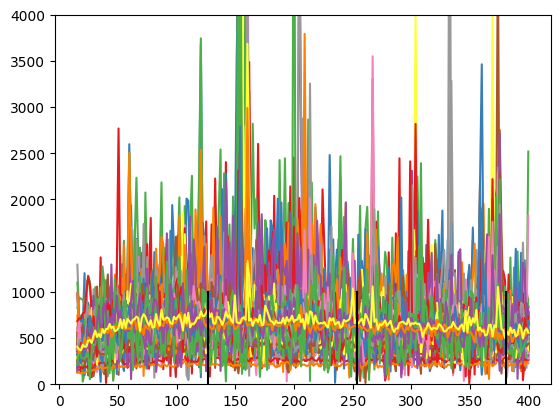

In [10]:
# test の可視化

fig,ax = plt.subplots()

for d in df_test_MTQ.iloc[:510,:].values.tolist():
    ax.plot(x,d)
    
ax.set_ylim(0,4000)
ax.plot([127,127],[0,1000],color="black") #MTQ 82
ax.plot([254,254],[0,1000],color="black") # MTQ3 165
ax.plot([381,381],[0,1000],color="black") # MTQ4 249

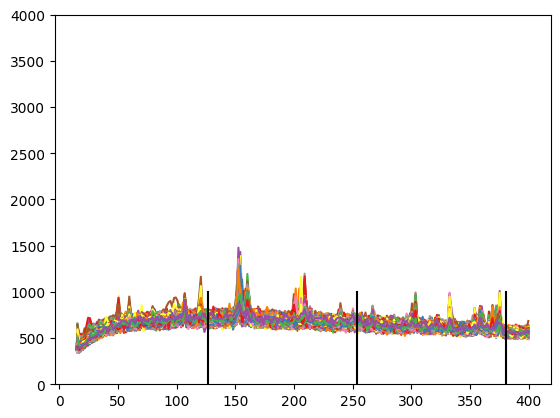

In [11]:
# train の可視化

fig,ax = plt.subplots()

for d in df_train.iloc[:2506,:].values.tolist():
    ax.plot(x,d)
    
ax.set_ylim(0,4000)
ax.plot([127,127],[0,1000],color="black") #MTQ 82
ax.plot([254,254],[0,1000],color="black") # MTQ3 165 
ax.plot([381,381],[0,1000],color="black") # MTQ4 249

## SGD Classifier MTQ

In [69]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_approximation import RBFSampler

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [70]:
x_train,x_grid,y_train,y_grid = train_test_split(df_train_MTQ.values.tolist(),y_train_MTQtrue,random_state=0,test_size=0.5)

sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)

sc = StandardScaler()
sc.fit(x_grid)
x_grid_std = sc.transform(x_grid)

sc = StandardScaler()
sc.fit(df_test_MTQ)
x_testMTQ_std = sc.transform(df_test_MTQ)

In [71]:
parameters = {
    "penalty":["l1","l2"],
    "alpha":[10**-7,10**-6,10**-5,10**-4,10**-3],
    "loss":["squared_hinge","hinge"]
    }
    

sgd = SGDClassifier(random_state=0)

S_grid = GridSearchCV(sgd,parameters,cv=3)

S_grid.fit(x_grid,y_grid)

print(S_grid.best_params_)

{'alpha': 1e-05, 'loss': 'squared_hinge', 'penalty': 'l1'}


In [72]:
sgd = SGDClassifier(random_state=0,alpha=1e-06, loss= 'hinge', penalty="l1")
sgd.fit(x_train_std,y_train)
df_sgd_predict = pd.DataFrame(sgd.predict(x_testMTQ_std))

(0.0, 4000.0)

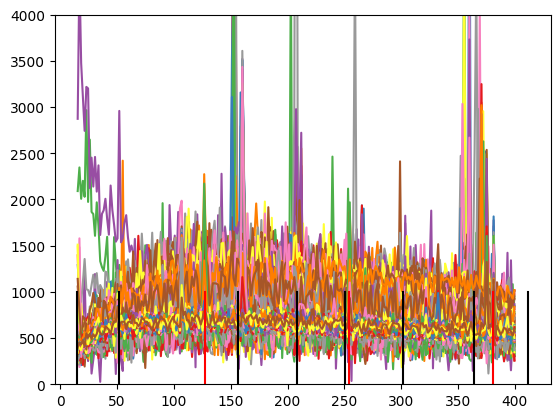

In [73]:
fig,ax = plt.subplots()
for d in df_test_MTQ[(df_sgd_predict==-1)[0]].values.tolist():
    ax.plot(x,d)
ax.plot([15,15],[0,1000],color="black") # STC
ax.plot([52,52],[0,1000],color="black") # JTC
ax.plot([156,156],[0,1000],color="black") # JTC3
ax.plot([208,208],[0,1000],color="black") # JTC4
ax.plot([251,251],[0,1000],color="black") #??
ax.plot([302,302],[0,1000],color="black") #?
ax.plot([364,364],[0,1000],color="black") #JTC7
ax.plot([412,412],[0,1000],color="black") #??

plt.plot([127,127],[0,1000],color="red") #MTQ 82
plt.plot([254,254],[0,1000],color="red") # MTQ3 166 
plt.plot([381,381],[0,1000],color="red") # MTQ4 249

ax.set_ylim(0,4000)

In [76]:
df_test_MTQ[ (df_sgd_predict==1)[0] &(y_test_MTQtrue == -1)]

9           10          11         12          13          14   \
1235  365.484416  389.808873  341.033256  385.38806  372.566577  425.954180   
1267  398.178378  422.781777  463.473021  245.30089  433.273406  525.096758   

             15          16         17          18   ...         252  \
1235  403.251056  509.053284  424.23765  479.127145  ...  518.165985   
1267  537.811552  359.021174  487.86647  555.152634  ...  637.299034   

              253         254         255         256         257         258  \
1235   621.365985  585.505046  502.434727  531.038893  555.378365  553.098737   
1267  1069.549698  736.266351  808.261660  719.742799  771.232890  703.424150   

             259         260         261  
1235  505.333428  502.762619  531.203168  
1267  514.678502  714.441624  608.477384  

[2 rows x 253 columns]

(0.0, 4000.0)

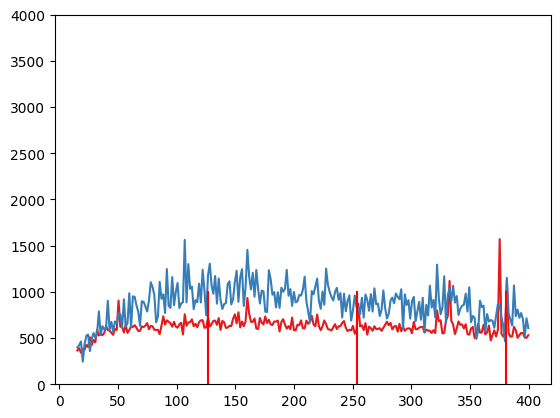

In [75]:
fig,ax = plt.subplots()
for d in df_test_MTQ[ (df_sgd_predict==1)[0] &(y_test_MTQtrue == -1)].values.tolist():
    ax.plot(x,d)
plt.plot([127,127],[0,1000],color="red") #MTQ 82
plt.plot([254,254],[0,1000],color="red") # MTQ3 166 
plt.plot([381,381],[0,1000],color="red") # MTQ4 249

ax.set_ylim(0,4000)

In [24]:
confusion_matrix(y_test_MTQtrue,df_sgd_predict)

array([[132,  32],
       [103, 407]])

## 再構成二乗誤差法

In [42]:
# low -2 mtq -1

df_train,df_test = myds.train_test_dataframe(df_data=df_data7_pre,test_frac=0.01)

#教師 normal　ピーク1500以下
df_train = df_train[(df_train.loc[:,[82,165,249]]<1500).all(axis=1)]

#教師 normal avarage 化

per=40
lim = len(df_train)//per*per

df_train = df_train.sample(frac=1)
df_train = df_train.to_numpy()[:lim].reshape([int(lim/per),per,len(df_train.to_numpy()[0])])
df_train = pd.DataFrame(myvs.avarange(df_train))
df_train.columns = df_data7_pre.columns

df_train_ = df_train
df_train_M = pd.concat([df_train_,df_ImamuraAbnormal_test])

#テストノーマル作成
df_test_ = df_test[~df_test.index.isin(df_test.loc[List_test_Lowindex].index)]
df_test_ = df_test_[(df_test.loc[:,[82,165,249]]<960).all(axis=1)]
df_test_ = df_test_[df_test_.diff(6,axis=1).loc[:,[82,165,249]].max(axis=1)<100]

df_tset_M = pd.concat([df_test_,df_ImamuraAbnormal_test])


#MTQ 教師作成
y_train_MTQtrue = np.concatenate([
np.ones(len(df_train_)),
np.ones(len(df_ImamuraAbnormal_train)),
np.ones(len(df_data6_MTQNoise_pre))*-1])

#MTQ test正解作成
y_test_MTQtrue = np.concatenate([
np.ones(len(df_test_)),
np.ones(len(df_ImamuraAbnormal_test)),
np.ones(len(df_data7_MTQNoise_pre))*-1])

# MTQ 学習データ
print(f"train_normallim:{len(df_train_)+len(df_ImamuraAbnormal_train)},MTQ:{len(df_train_)+len(df_ImamuraAbnormal_train)+len(df_data6_MTQNoise_pre)}")
df_train_MTQ = pd.concat([df_train_,df_ImamuraAbnormal_test,df_data6_MTQNoise_pre])
df_train_MTQ.index = range(len(df_train_MTQ))

#MTQ テストデータ
print(f"test_normallim:{len(df_test_)+len(df_ImamuraAbnormal_test)},MTQ:{len(df_test_)+len(df_ImamuraAbnormal_test)+len(df_data7_MTQNoise_pre)}")
df_test_MTQ = pd.concat([df_test_,df_ImamuraAbnormal_test,df_data7_MTQNoise_pre])
df_test_MTQ.index = range(len(df_test_MTQ))


df_test_MTQ

train_normallim:3184,MTQ:3594
test_normallim:1188,MTQ:1352


/usr/local/conda/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


9           10          11          12          13          14   \
0     359.939335  305.009975  383.548598  419.634708  478.505839  445.079677   
1     368.079003  385.467947  386.995202  431.936161  421.942038  474.774478   
2     363.084594  342.044058  389.255341  349.032846  363.734724  376.012616   
3     404.232205  385.209027  470.606089  428.973113  437.002366  440.996033   
4     380.413591  420.594303  432.283247  500.801016  442.903777  450.782243   
...          ...         ...         ...         ...         ...         ...   
1347  440.096281  450.255655  408.202903  412.718458  443.608239  459.440134   
1348  416.102273  441.201175  393.530947  416.273711  401.100273  515.534583   
1349  431.433298  397.619080  391.720098  441.552992  437.972307  434.831203   
1350  418.637556  394.151357  368.705104  429.003071  447.971373  483.589411   
1351  397.221305  451.754336  432.066704  474.589305  407.204769  550.821900   

             15          16          17          18   ...         252  \
0     546.612099  498.405882  467.907978  531.327323  ...  494.065047   
1     492.335086  474.966898  515.121131  559.896809  ...  499.857354   
2     468.670571  519.524253  488.969860  461.593305  ...  597.286630   
3     476.860956  562.729036  502.461777  462.175828  ...  577.919973   
4     499.858340  486.075742  493.380690  508.458856  ...  556.575178   
...          ...         ...         ...         ...  ...         ...   
1347  448.775449  443.550527  462.472171  502.677509  ...  579.803737   
1348  480.762807  472.966968  512.277523  557.415532  ...  562.580605   
1349  466.412841  470.544239  494.826235  504.709924  ...  579.115874   
1350  430.940729  507.173067  509.871661  510.015659  ...  525.327809   
1351  504.539071  549.955433  490.316556  541.218523  ...  584.097337   

             253         254         255         256         257         258  \
0     527.623070  574.743895  536.267035  514.494529  571.053904  563.729693   
1     533.262493  556.078484  572.894612  571.986860  568.510317  815.902818   
2     564.469085  582.708669  582.788523  505.306679  544.526457  558.370512   
3     809.959152  533.829875  538.100628  540.769864  608.070366  578.336993   
4     500.771119  575.377554  537.160458  518.368767  486.349777  560.249236   
...          ...         ...         ...         ...         ...         ...   
1347  569.375994  537.338082  544.808569  613.509386  532.031070  620.298071   
1348  635.775907  534.057927  588.052567  643.944812  602.531485  540.459055   
1349  549.490873  585.475760  559.953766  616.226970  558.948577  538.720823   
1350  684.979064  546.751741  511.277899  625.688249  730.692813  578.031084   
1351  537.075133  566.948401  610.244926  601.852590  551.698311  602.423938   

             259          260         261  
0     568.042821   548.517015  685.543269  
1     525.637343   574.612961  528.611985  
2     447.999563   541.003572  539.918856  
3     557.090466   503.773497  585.446671  
4     828.458942  1083.268573  606.167034  
...          ...          ...         ...  
1347  616.105981   491.091570  592.421792  
1348  569.925625   572.215085  558.833956  
1349  535.294248   569.687009  537.774431  
1350  574.703413   573.884882  500.865405  
1351  571.663399   525.542650  598.401061  

[1352 rows x 253 columns]

In [43]:
import functools
from sklearn.decomposition import PCA

def J_PCA(k,X_train,X_test=False):
    
    if X_test == False:
        X_test = X_train
    
    pca = PCA(n_components=k,random_state=0)
    pca.fit(X_train)
    
    W = pca.components_
    mu = np.array(X_test).mean(axis=0)
    
    y_expect = np.array(list(map(
        ,X_test)))
    gosa = y_expect-X_test
    J_pca = np.sum(gosa**2,axis=1)
    
    return J_pca

def y_recon_func(x,W,mu):
    return np.dot(W.T,np.dot(W,x-mu))+mu

In [44]:
sc = StandardScaler()
sc.fit(df_train_M)
List_train_std = sc.transform(df_train_M)

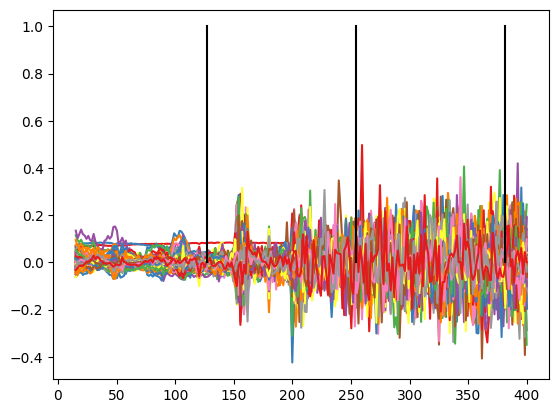

In [45]:
pca = PCA(n_components=200)
pca.fit(List_train_std)
List_pca_result_kari = pca.transform(List_train_std)

for i in range(100):
    plt.plot(x,pca.components_[i],label=f"{i}")
plt.plot([127,127],[0,1],color="black") #MTQ 82
plt.plot([254,254],[0,1],color="black") # MTQ3 166 
plt.plot([381,381],[0,1],color="black") # MTQ4 249

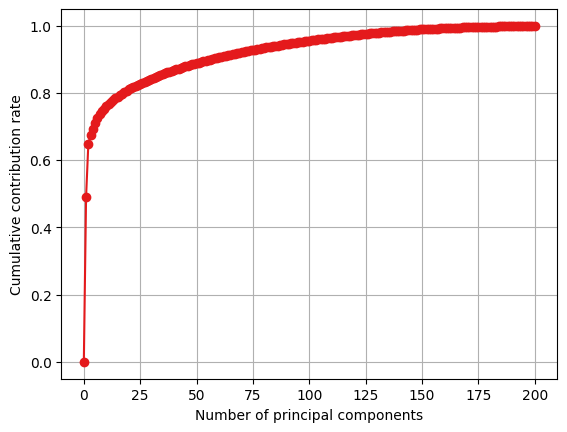

In [46]:
import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution rate")
plt.grid()
plt.show()

In [51]:
k = 150

In [52]:
pca = PCA(n_components=k,random_state=0)
pca.fit(List_train_std)
    
W = pca.components_
mu = np.array(x_testMTQ_std).mean(axis=0)
    
y_expect = np.array(list(map(functools.partial(y_recon_func,W=W,mu=mu),x_testMTQ_std)))
gosa = y_expect-x_testMTQ_std
J_pca = np.sum(gosa**2,axis=1)

In [53]:
J_PCA_List = pd.DataFrame(J_pca)

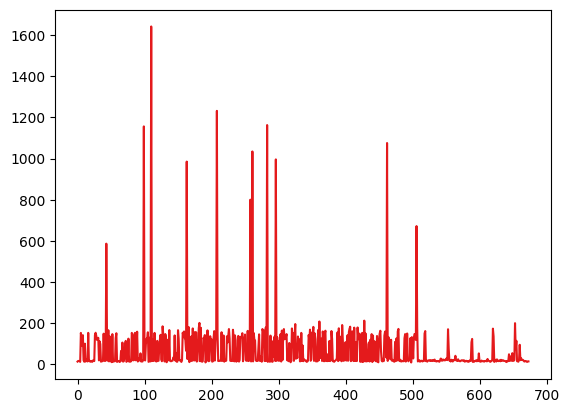

In [54]:
fig,ax = plt.subplots()

lim = len(J_PCA_List)

ax.plot(range(len(J_PCA_List)),J_PCA_List)

(array([364.,  65.,   8.,   9.,  13.,  39.,  61.,  62.,  32.,   7.,   3.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   2.,   0.,   1.,   0.,   1.,   0.,
          0.,   0.,   1.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.]),
 array([   0.,   20.,   40.,   60.,   80.,  100.,  120.,  140.,  160.,
         180.,  200.,  220.,  240.,  260.,  280.,  300.,  320.,  340.,
         360.,  380.,  400.,  420.,  440.,  460.,  480.,  500.,  520.,
         540.,  560.,  580.,  600.,  620.,  640.,  660.,  680.,  700.,
         720.,  740.,  760.,  780.

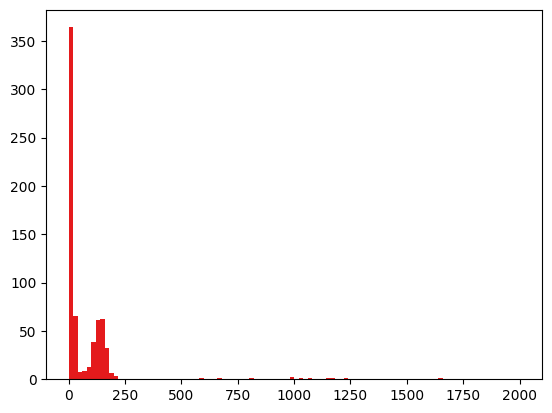

In [55]:
fig,ax = plt.subplots()
ax.hist(J_PCA_List,bins=100,range=[0,2000])

In [37]:
import copy
y_PCA_true = copy.copy(y_test_MTQtrue)
y_PCA_true[y_test_MTQtrue<0] = -1


In [38]:
len(y_PCA_true)

1352

In [39]:
List_PCA_result = []
for lim in range(0,200):
    y_PCA_pred = np.ones(len(df_test_MTQ))
    y_PCA_pred[J_PCA_List[(J_PCA_List>lim)[0]].index]=-1
    m = confusion_matrix(y_PCA_true,y_PCA_pred)
    
    FP = m[1][0]/sum(m[1])
    TP = m[0][0]/sum(m[0])
    
    List_PCA_result.append([FP,TP])
    

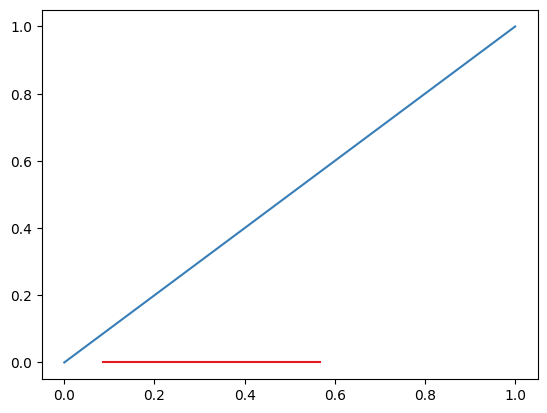

In [41]:
fig,ax = plt.subplots()

ax.plot(List_PCA_result.T[0],List_PCA_result.T[1])
ax.plot([0,1],[0,1])

In [1]:
## 再構成二乗誤差法　kmeans

In [113]:
import numpy as np
def J_Kmeans(k,X_train,X_test=False):
    np_test = np.array(X_test)
    if X_test == False:
        X_test = X_train
    miniKM = MiniBatchKMeans(n_clusters=k,random_state=0)
    miniKM.fit(X_train)
    centers = miniKM.cluster_centers_
    clusters = miniKM.predict(X_test)
    cluster_centers = np.array([centers[i] for i in clusters])
    gosa_vectors =  cluster_centers-np_test
    gosas = np.sqrt(np.sum(gosa_vectors**2,axis=1))
    return gosas

In [114]:
k=1

In [115]:
from sklearn.cluster import MiniBatchKMeans

In [116]:
J_KMeans_List=J_Kmeans(k,df_train_MTQ.values.tolist(),df_test_MTQ.values.tolist())
J_KMeans_List = pd.DataFrame(J_KMeans_List)
J_KMeans_List.index = df_test_MTQ.index
J_KMeans_List

0
0    1050.119931
1    2414.383654
2    1096.029153
3    1102.099158
4    2055.378607
..           ...
409  1398.765724
410  1122.078932
411  1010.820828
412  1096.689125
413  1179.199135

[414 rows x 1 columns]

(array([  0., 138., 110.,  63.,  49.,  12.,   5.,   7.,   9.,   4.,   7.,
          3.,   5.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.]),
 array([    0.,   600.,  1200.,  1800.,  2400.,  3000.,  3600.,  4200.,
         4800.,  5400.,  6000.,  6600.,  7200.,  7800.,  8400.,  9000.,
         9600., 10200., 10800., 11400., 12000., 12600., 13200., 13800.,
        14400., 15000., 15600., 16200., 16800., 17400., 18000., 18600.,
        19200., 19800., 20400.

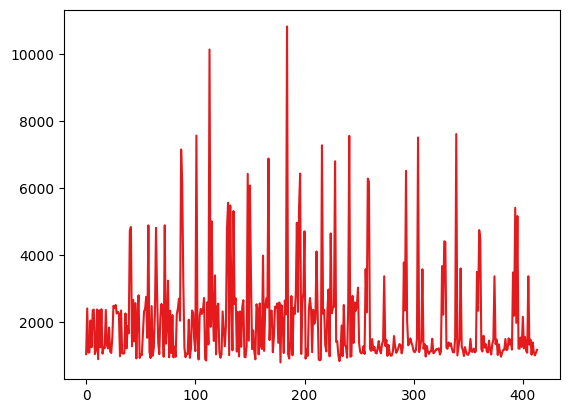

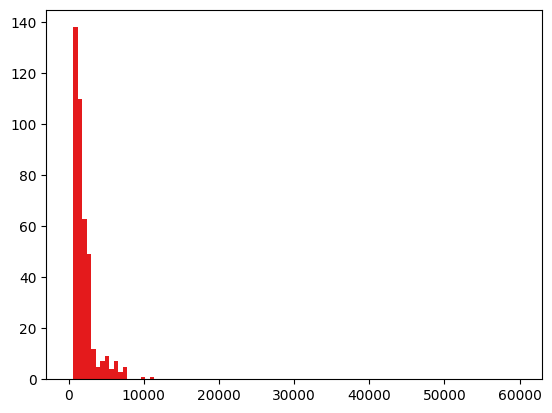

In [117]:
fig,ax = plt.subplots()

ax.plot(range(len(J_KMeans_List)),J_KMeans_List)

fig,ax = plt.subplots()

ax.hist(J_KMeans_List,bins=100,range=[0,60000])

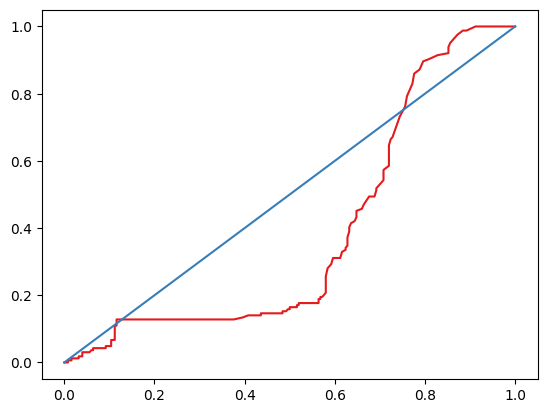

In [118]:
import copy
from sklearn.metrics import confusion_matrix

y_Kmeans_true = copy.copy(y_test_MTQtrue)
y_Kmeans_true[y_test_MTQtrue<0] = -1

List_Kmeans_result = []

for lim in range(0,20000,10):
    y_Kmeans_pred = np.ones(len(df_test_MTQ))
    y_Kmeans_pred[J_KMeans_List[(J_KMeans_List>lim)[0]].index]=-1
    m = confusion_matrix(y_Kmeans_true,y_Kmeans_pred)
    
    FP = m[1][0]/sum(m[1])
    TP = m[0][0]/sum(m[0])
    
    List_Kmeans_result.append([FP,TP])

List_Kmeans_result = np.array(List_Kmeans_result)
fig,ax = plt.subplots()

ax.plot(List_Kmeans_result.T[0],List_Kmeans_result.T[1])
ax.plot([0,1],[0,1])


In [30]:
# One Class SVC

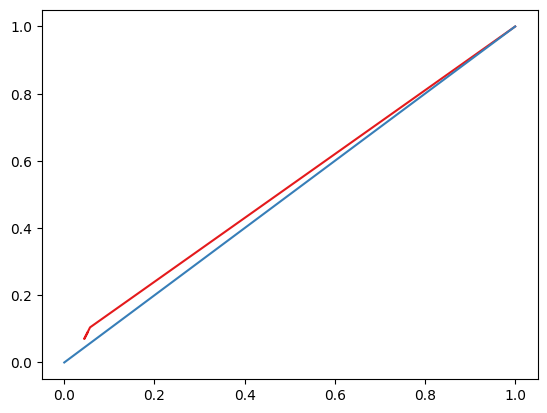

In [55]:
from sklearn.svm import OneClassSVM

sc = StandardScaler()
sc.fit(df_train_)
List_train_std = sc.transform(df_train_)



List_OneClass_result = []

for nu in [1,0.1,0.01,0.001,0.00001]:

    ocsvm = OneClassSVM(nu=nu)
    ocsvm.fit(List_train_std)
    df_unsu_ocsvm_result = ocsvm.predict(List_test_std)
    df_unsu_ocsvm_result = pd.DataFrame(df_unsu_ocsvm_result)
    df_unsu_ocsvm_result.index = df_test.index
    df_unsu_ocsvm_result

    df_unsp_ocsvm_normal = df_test[df_test.index.isin(df_unsu_ocsvm_result[df_unsu_ocsvm_result[0]==-1].index)]
    List_unsp_ocsvm_normal = df_unsu_ocsvm_result[0].values.tolist()
    m = confusion_matrix(y_Kmeans_true,List_unsp_ocsvm_normal)
    
    FP = m[1][0]/sum(m[1])
    TP = m[0][0]/sum(m[0])
    
    List_OneClass_result.append([FP,TP])

List_OneClass_result = np.array(List_OneClass_result)

fig,ax = plt.subplots()

ax.plot(List_OneClass_result.T[0],List_OneClass_result.T[1])
ax.plot([0,1],[0,1])



## KNN法

In [73]:
sc = StandardScaler()
sc.fit(df_train_)
List_train_std = sc.transform(df_train_)

List_train_std = df_test_.values.tolist()

In [76]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

def KNNAnomalyRate(k,trainList,testList):
    
    nn = NearestNeighbors(n_neighbors=k)
    nn.fit(trainList)
    neig,ind = nn.kneighbors(testList)

    return neig
    

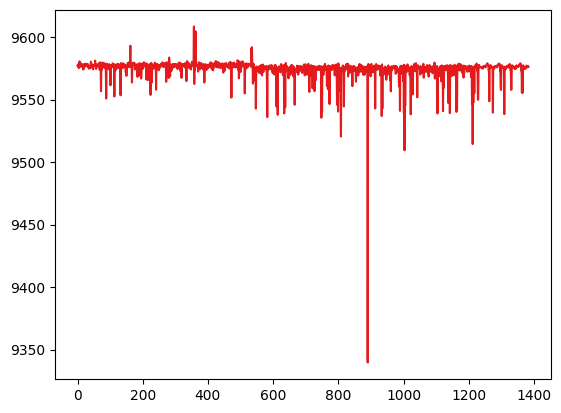

In [90]:
fig,ax = plt.subplots()

List_KNN_rate = KNNAnomalyRate(10,List_train_std,List_test_std)
ax.plot(range(len(List_KNN_rate)),List_KNN_rate.T[9])